In [ ]:

import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import load_iris 
import matplotlib.pyplot as plt

In [ ]:

def plot_decision_boundaries(X, y, clf, labels):
  n_classes = 3 
  plot_colors = "ryb" 

 
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), 
                       np.arange(y_min, y_max, 0.02))


  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
  


  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c = color, 
                label=iris.target_names[i], cmap = plt.cm.RdYlBu, 
                edgecolor="k", s=40,)

  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.legend(loc='lower right')
  plt.show()

In [ ]:

def plot_decision_boundary(X, y, clf, labels):

  w = clf.coef_[0]
  a = -w[0]/w[1]
  xx = np.linspace(-5,5)
  yy = a*xx - (clf.intercept_[0]) / w[1]


  margin = 1/np.sqrt(np.sum(clf.coef_**2))
  yy_down = yy - np.sqrt(1+a**2)* margin
  yy_up = yy + np.sqrt(1+a**2)* margin


  plt.figure(figsize=(10,10))
  plt.clf()
  plt.plot(xx,yy,color='green')
  plt.plot(xx,yy_down, color='blue', linestyle='dashed')
  plt.plot(xx,yy_up, color='red', linestyle='dashed')

  plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], 
              marker='*', c='g', s=160, edgecolors='k')

  from matplotlib.colors import ListedColormap
  cm_bright = ListedColormap(['#FF0000', '#0000FF']) 
  plt.scatter(X[:,0], X[:,1], c=y, zorder=10, cmap=cm_bright, edgecolors='k')

  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.ylim(-2, 2)
  plt.xlim(-2, 2)
  plt.show()

In [ ]:

iris = load_iris()

X = iris.data[:, :2]

X2 = iris.data[:, 2:]

y = iris.target 

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X2 = scaler.fit_transform(X2)

labels = ['sepal length (cm)', 'sepal width (cm)']
labels2 = ['petal length (cm)','petal width (cm)']

In [ ]:
y_setosa = np.where(y == 0,1,0) 
y_setosa

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
clf = SVC(kernel='linear') 
clf.fit(X2, y_setosa) 

SVC(kernel='linear')

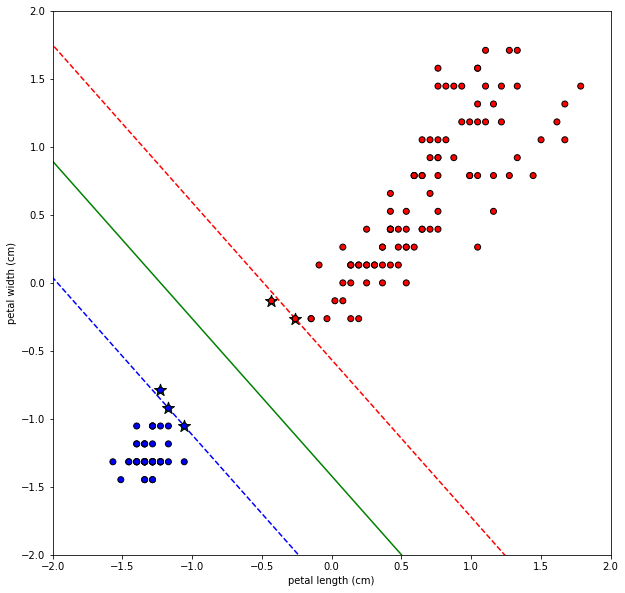

In [ ]:

plot_decision_boundary(X2, y_setosa, clf, labels2)

In [ ]:

y_versicolor = np.where(y == 1,1,0)
y_versicolor

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
clf = SVC(kernel='linear') 
clf.fit(X2, y_versicolor) 

SVC(kernel='linear')

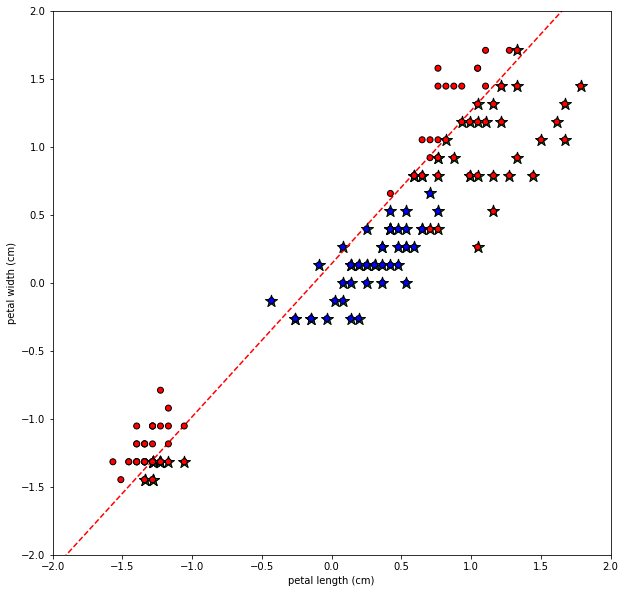

In [ ]:
plot_decision_boundary(X2, y_versicolor, clf, labels2)

In [ ]:

y_virginica = np.where(y == 2,1,0)
y_virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
clf = SVC(kernel='linear') 
clf.fit(X2, y_virginica) 

SVC(kernel='linear')

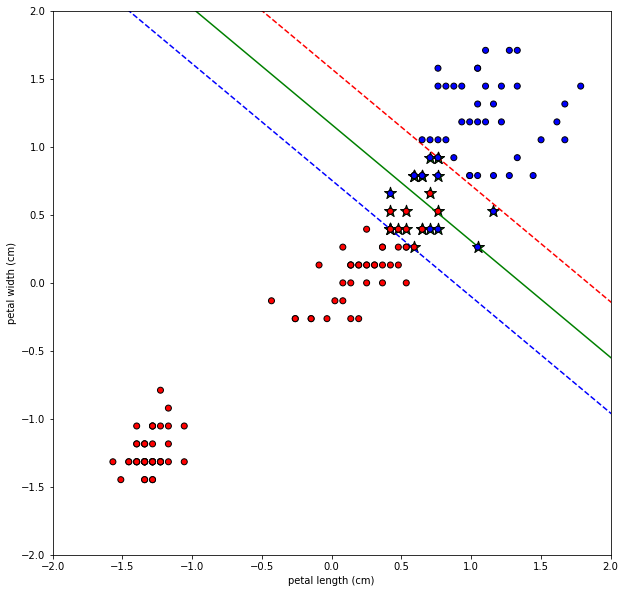

In [ ]:

plot_decision_boundary(X2, y_virginica, clf, labels2)

In [ ]:

clf = SVC(kernel="linear")

clf.fit(X, y)

clf2 = SVC(kernel="linear")

clf2.fit(X2, y)

SVC(kernel='linear')

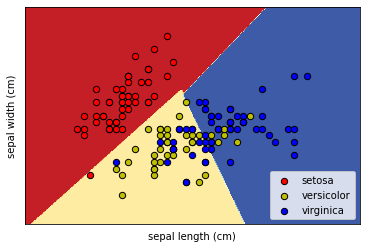

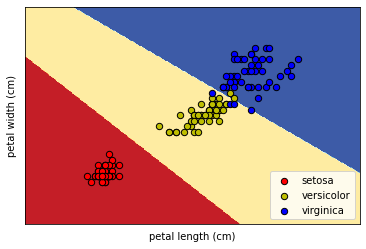

In [ ]:

plot_decision_boundaries(X, y, clf, labels)
plot_decision_boundaries(X2, y, clf2, labels2)